In [ ]:
#import packages
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Loading and Initial Inspection

In [ ]:
#reading the data
df = pd.read_csv("/content/drive/MyDrive/Sample - Superstore.csv", encoding='latin-1')
# first few rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# check columns, data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
# checking missing values
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


Summary Statistics

In [ ]:
# Summary statistics for Sales, Profit, and Quantity
summary_stats = df[['Sales', 'Profit', 'Quantity']].describe()

print(summary_stats)

              Sales       Profit     Quantity
count   9994.000000  9994.000000  9994.000000
mean     229.858001    28.656896     3.789574
std      623.245101   234.260108     2.225110
min        0.444000 -6599.978000     1.000000
25%       17.280000     1.728750     2.000000
50%       54.490000     8.666500     3.000000
75%      209.940000    29.364000     5.000000
max    22638.480000  8399.976000    14.000000


Sales by Product Category and Sub-Category

In [ ]:
df.groupby(['Category', 'Sub-Category'])[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

Sales      Profit
Category        Sub-Category                         
Technology      Phones        330007.0540  44515.7306
Furniture       Chairs        328449.1030  26590.1663
Office Supplies Storage       223843.6080  21278.8264
Furniture       Tables        206965.5320 -17725.4811
Office Supplies Binders       203412.7330  30221.7633
Technology      Machines      189238.6310   3384.7569
                Accessories   167380.3180  41936.6357
                Copiers       149528.0300  55617.8249
Furniture       Bookcases     114879.9963  -3472.5560
Office Supplies Appliances    107532.1610  18138.0054
Furniture       Furnishings    91705.1640  13059.1436
Office Supplies Paper          78479.2060  34053.5693
                Supplies       46673.5380  -1189.0995
                Art            27118.7920   6527.7870
                Envelopes      16476.4020   6964.1767
                Labels         12486.3120   5546.2540
                Fasteners       3024.2800    949.5182

A bar charts and pie charts to visualize the sales and profit contribution of different categories and sub-categories.

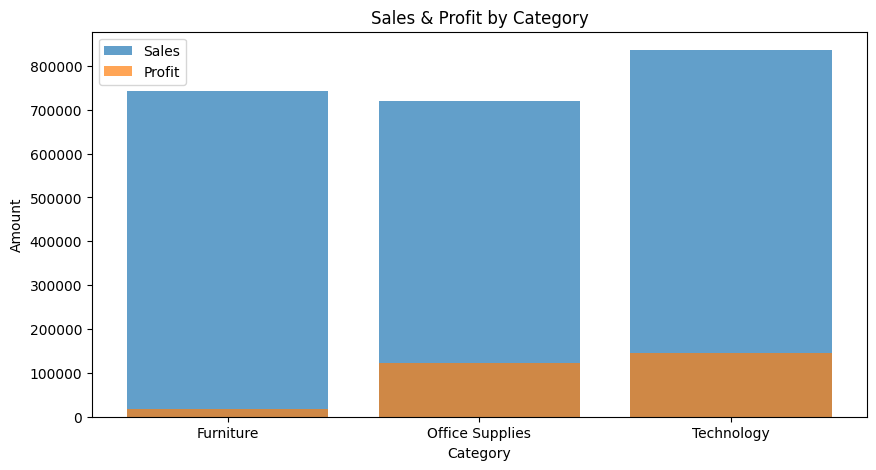

In [ ]:
#sales and profit contribution of different categories
category_group = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(10,5))
plt.bar(category_group['Category'], category_group['Sales'], label='Sales', alpha=0.7)
plt.bar(category_group['Category'], category_group['Profit'], label='Profit', alpha=0.7)
plt.xlabel("Category")
plt.ylabel("Amount")
plt.title("Sales & Profit by Category")
plt.legend()
plt.show()

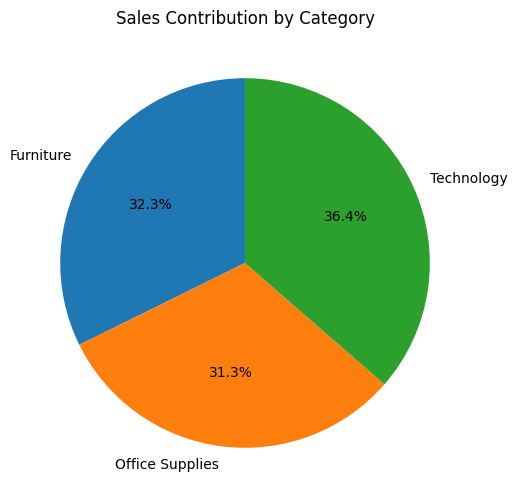

In [ ]:
category_group = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(6,6))
plt.pie(category_group['Sales'], labels=category_group['Category'], autopct='%1.1f%%', startangle=90)
plt.title("Sales Contribution by Category")
plt.show()

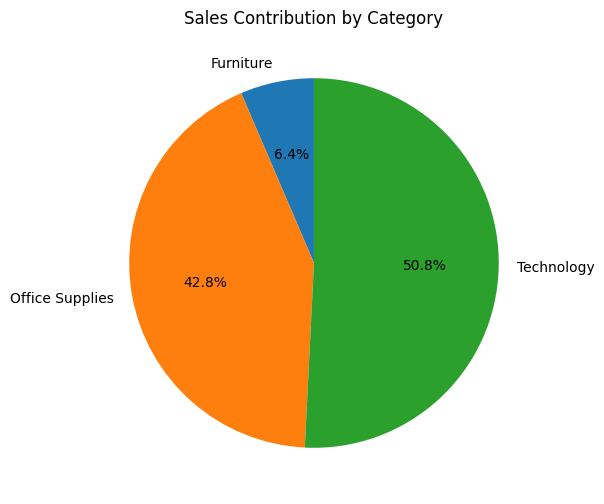

In [ ]:
category_group = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(6,6))
plt.pie(category_group['Profit'], labels=category_group['Category'], autopct='%1.1f%%', startangle=90)
plt.title("Sales Contribution by Category")
plt.show()

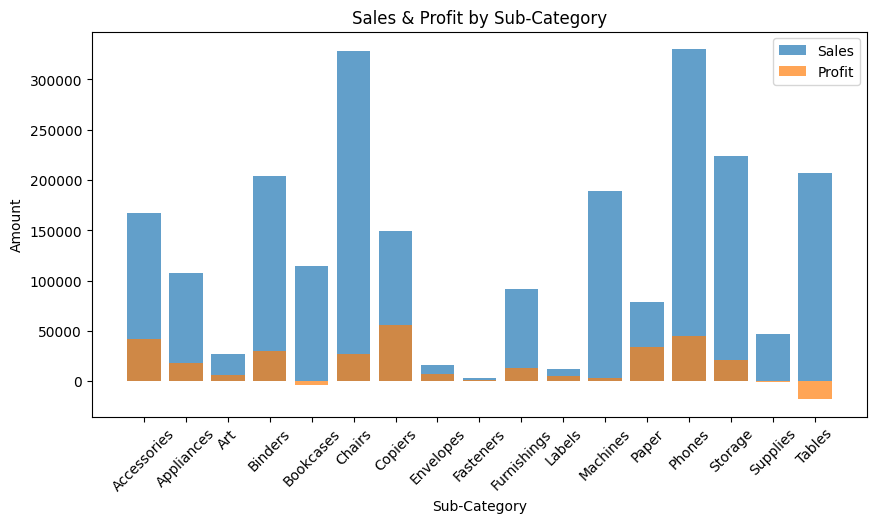

In [ ]:
#sales and profit contribution of different sub-categories
category_group = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(10,5))
plt.bar(category_group['Sub-Category'], category_group['Sales'], label='Sales', alpha=0.7)
plt.bar(category_group['Sub-Category'], category_group['Profit'], label='Profit', alpha=0.7)
plt.xlabel("Sub-Category")
plt.xticks(rotation = 45)
plt.ylabel("Amount")
plt.title("Sales & Profit by Sub-Category")
plt.legend()
plt.show()

Sales by Region and Customer Segment:

In [ ]:
# Group by Region and Segment
region_segment_group = df.groupby(['Region', 'Segment'])[['Sales', 'Profit']].sum().reset_index()

print(region_segment_group)

     Region      Segment        Sales      Profit
0   Central     Consumer  252031.4340   8564.0481
1   Central    Corporate  157995.8128  18703.9020
2   Central  Home Office   91212.6440  12438.4124
3      East     Consumer  350908.1670  41190.9843
4      East    Corporate  200409.3470  23622.5789
5      East  Home Office  127463.7260  26709.2168
6     South     Consumer  195580.9710  26913.5728
7     South    Corporate  121885.9325  15215.2232
8     South  Home Office   74255.0015   4620.6343
9      West     Consumer  362880.7730  57450.6040
10     West    Corporate  225855.2745  34437.4299
11     West  Home Office  136721.7770  16530.4150


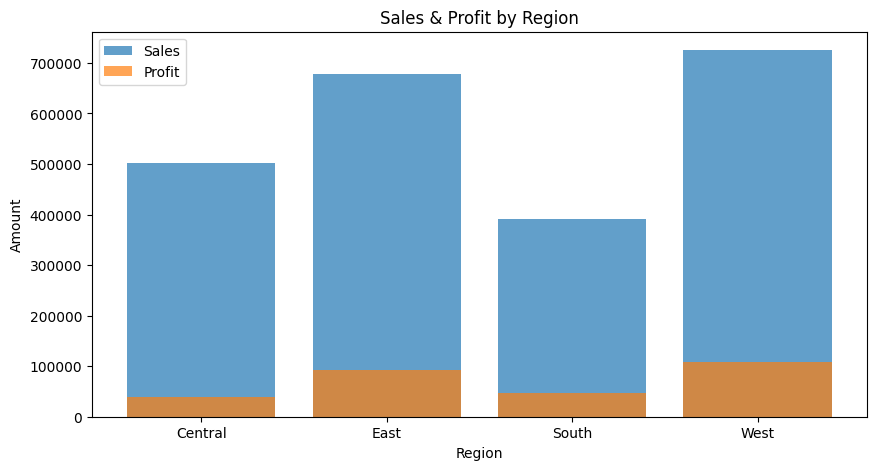

In [ ]:
#sales and profit contribution of different Region
region_segment_group = df.groupby(['Region'])[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(10,5))
plt.bar(region_segment_group['Region'], region_segment_group['Sales'], label='Sales', alpha=0.7)
plt.bar(region_segment_group['Region'], region_segment_group['Profit'], label='Profit', alpha=0.7)
plt.xlabel("Region")
plt.ylabel("Amount")
plt.title("Sales & Profit by Region")
plt.legend()
plt.show()

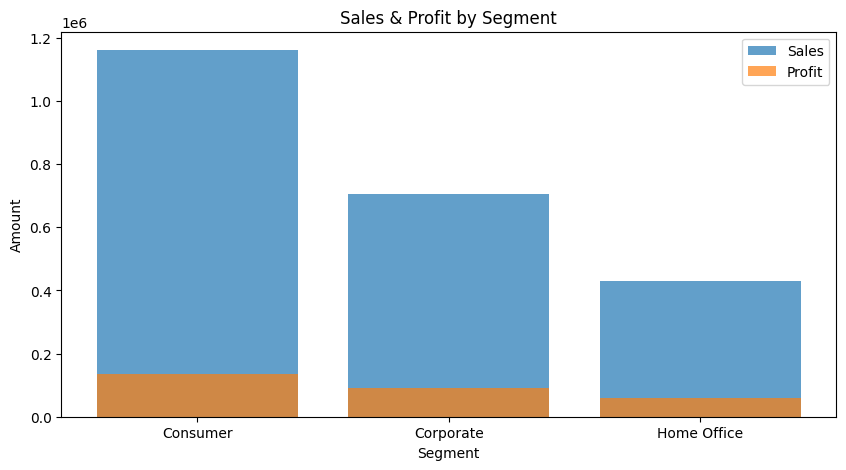

In [ ]:
#sales and profit contribution of different Segment
region_segment_group = df.groupby(['Segment'])[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(10,5))
plt.bar(region_segment_group['Segment'], region_segment_group['Sales'], label='Sales', alpha=0.7)
plt.bar(region_segment_group['Segment'], region_segment_group['Profit'], label='Profit', alpha=0.7)
plt.xlabel("Segment")
plt.ylabel("Amount")
plt.title("Sales & Profit by Segment")
plt.legend()
plt.show()

Sales Trends Over Time:

In [ ]:
#Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [ ]:
#Aggregate sales data by month and year
df['YearMonth'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()

In [ ]:
# Convert YearMonth back to datetime for plotting
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()

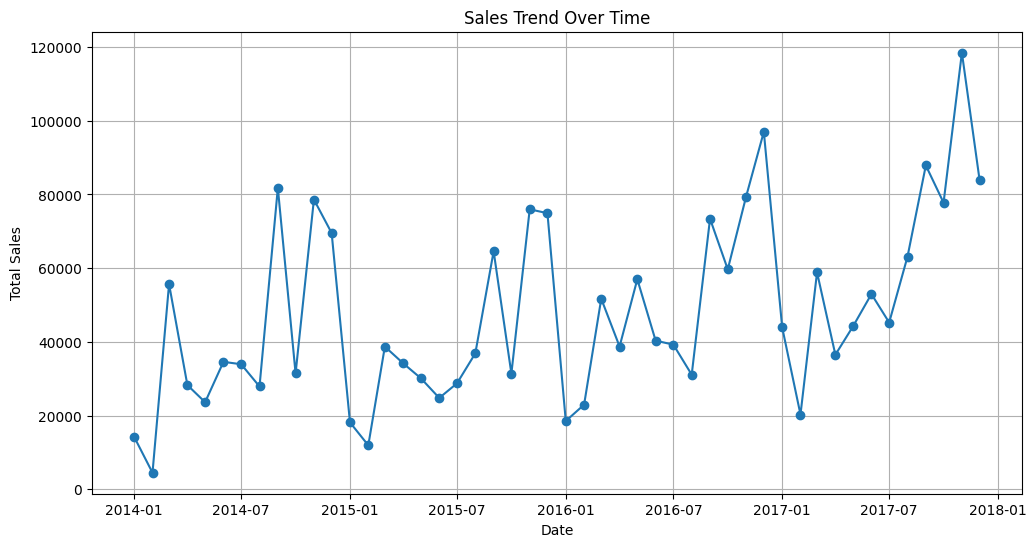

In [ ]:
#Create line chart
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Sales'], marker='o')
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

Hypothesis Testing (Related to Sales Performance):

Hypothesis 1: The average sales in the 'West' region are significantly higher than the average sales in the 'East' region. (Test using a t-test)

H₀ (Null Hypothesis): The average sales in Region A and Region B are equal

H₁ (Alternative Hypothesis): The average sales in Region A and Region B are different.

In [ ]:
from scipy.stats import ttest_ind

# Filter sales data for West and East regions
west_sales = df[df['Region'] == 'West']['Sales']
east_sales = df[df['Region'] == 'East']['Sales']

# Perform independent t-test (one-tailed)
t_stat, p_val = ttest_ind(west_sales, east_sales, equal_var=False)

# Adjust p-value for one-tailed test
p_val_one_tailed = p_val / 2

print(f"T-statistic: {t_stat}")
print(f"One-tailed P-value: {p_val_one_tailed}")

# Interpretation
if (p_val_one_tailed < 0.05) and (t_stat > 0):
    print("Reject H₀ → Average sales in West are significantly higher than in East.")
else:
    print("Fail to reject H₀ → No significant evidence that West sales are higher.")


T-statistic: -0.796108463300414
One-tailed P-value: 0.21300135875160692
Fail to reject H₀ → No significant evidence that West sales are higher.


Hypothesis 2: The 'Technology' product category generates significantly higher total profit than the 'Office Supplies' category. (Compare total profits and potentially use a statistical test if needed).

H₀ (Null Hypothesis): μ₍Technology₎ = μ₍Office Supplies₎

H₁ (Alternative Hypothesis): μ₍Technology₎ > μ₍Office Supplies₎ (One-tailed t-test)

In [ ]:
from scipy.stats import ttest_ind

# Filter profit data for Technology and Office Supplies categories
tech_profit = df[df['Category'] == 'Technology']['Profit']
office_profit = df[df['Category'] == 'Office Supplies']['Profit']

# Perform independent t-test (unequal variance)
t_stat, p_val = ttest_ind(tech_profit, office_profit, equal_var=False)

# Adjust p-value for one-tailed test
p_val_one_tailed = p_val / 2

print(f"T-statistic: {t_stat}")
print(f"One-tailed P-value: {p_val_one_tailed}")

# Interpretation
if (p_val_one_tailed < 0.05) and (t_stat > 0):
    print("Reject H₀ → Technology category generates significantly higher profit than Office Supplies.")
else:
    print("Fail to reject H₀ → No significant evidence that Technology profits are higher.")


T-statistic: 5.727116546675228
One-tailed P-value: 5.874921570959242e-09
Reject H₀ → Technology category generates significantly higher profit than Office Supplies.


Model Building, Prediction, and Evaluation

In [ ]:
#splitting our dataset
from sklearn.model_selection import train_test_split

# Independent variable (X) and dependent variable (y)
X = df[['Quantity']]  # feature
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


MSE: 567865.6723422331
RMSE: 567865.6723422331
R² Score: 0.038655024251615044
